<a href="https://colab.research.google.com/github/codefox96/Thresholding-with-Python/blob/master/Threshold_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3574 - accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7435 - accuracy: 0.7500
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7500
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 1.0000
Epoch 6/200
4/4 [==============================] - 0s 54ms/step - loss: 0.2934 - accuracy: 1.0000
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1986 - accuracy: 1.0000
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 1.0000
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 1.0000
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 1.0000
Epoch 11/200
4/4 [======

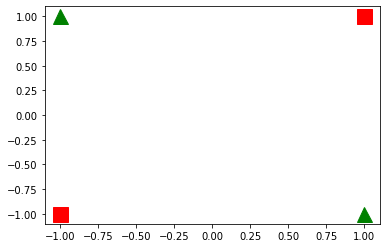

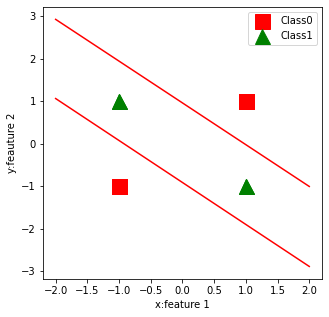

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import numpy as np

#Function that plots a visual representation of the 4 classes defined by the inputs of an 'Or' logic gate ((0,0),(0,1),(1,0),(1,1))
def plot_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
    features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^',markersize=15)
  
#Function that places 2 thresholds that group the inputs that yeild similar results 
def plot_thr(features,labels,params,classes):
  plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
    features[labels[:]==classes[1],0],features[labels[:]==classes[1],1],'g^',markersize=15)
  x1=np.linspace(-2,2,50)
  x2=-(params[0]*x1+params[2])/params[1]
  plt.plot(x1,x2,'-r')
  plt.xlabel('x:feature 1')
  plt.ylabel('y:feauture 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])

#Function that plots the training loss and accuracy curve of its inputs 
def plot_curve(acc_curve,loss_curve):
  epo=np.arange(loss_curve.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epo,acc_curve)
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epo,loss_curve)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary Cross. loss')
  plt.title('Training Loss')

  plt.show()


#Creates an array for the inputs and the labels
features=np.array([[0,0],[0,1],[1,0],[1,1]])
features=(features-np.mean(features,axis=0))/np.std(features,axis=0)
labels=np.array([0,1,1,0],dtype=np.uint8)
classes=[0,1]

#Gives visual representation of output options
plot_fun(features,labels,classes)

#Creates a simple model which tests the accuracy and loss of the predictions
mod_xor=Sequential()
mod_xor.add(Dense(2,input_dim=2,activation='tanh',kernel_initializer='glorot_normal'))
mod_xor.add(Dense(1,activation='sigmoid'))


#Compiling the model
mod_xor.compile(loss='binary_crossentropy',optimizer=Adam(lr=.5),metrics=['accuracy'])

#Training the model and defining the batch size
history=mod_xor.fit(features,labels,batch_size=1,epochs=200)

#Plots the threshold lines based on the the final results of the trained model
weights=mod_xor.layers[0].get_weights()
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  params=np.array(weights[0][:,node_i])
  params=np.append(params,weights[1][node_i])
  plot_thr(features,labels,params,classes)




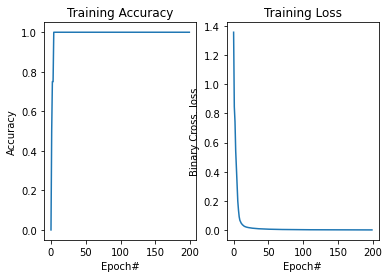

In [0]:
#Graphical representation of of training loss and accuracy
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)